### Student grades prediction

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

**Columns Description** ==>  total 43 columns

**Seat No** : The enrolled number of candidate that took the exams

**CGPA** : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the candidate took exam

 
Predict - CGPA of a student based on different grades in four years.



In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Grades.csv')

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


- The dataset has both 90% of categorical and 10% of numerical data

In [4]:
df.shape

(571, 43)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

- We have two dtypes: float64(1), object(42) with memory usage: 191.9+ KB

In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

- We renamed the columns to bring uniformity of the feautres

In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

In [9]:
df.drop(['Seat No.'],axis='columns',inplace=True)

- As we are predicting students grades by taking input of 4 years score, so I intend to drop Seat Number as its input has least value 

In [10]:
df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [11]:
df.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

- Dataset so many null values

###### Filling na

In [12]:
df = df.apply(lambda x: x.fillna(x.mode().iloc[0]))

- Filling null values using mode method

In [13]:
df.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

- Data is clear from null values

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64


HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64


CY-105
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64


HS-105
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64


MT-111
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64


CS-105
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: count, dtype: int64


CS-106
A-    118
B+    101
B      96
A      56
B-     54
C+     4

- We tried to trace out the unique values in each column of the dataset using value_counts() method

In [15]:
for i in df.columns:
    df.drop(df[(df.loc[:, i] == 'WU') | (df.loc[:, i] == 'W') | (df.loc[:, i] == 'I')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

- We have to drop unusual data where it adds no value to the grade for which student scored like WU, W and I

In [16]:
df.shape

(547, 42)

- After dropping the unwanted rows the data from 571 dropped to 547 rows with 42 columns

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PH-121
A-    112
A     110
B+     58
B      56
B-     53
D      37
C      31
C+     30
D+     22
A+     22
C-     15
F       1
Name: count, dtype: int64


HS-101
A-    80
B-    75
C     67
B     62
B+    58
C-    48
C+    45
D     40
A     38
D+    29
A+     4
F      1
Name: count, dtype: int64


CY-105
A     174
A-    117
B+     49
B      46
B-     39
A+     31
D      27
C      19
C-     16
C+     15
D+     14
Name: count, dtype: int64


HS-105
A     95
A-    71
B+    69
B     56
D     41
B-    39
C     37
C-    36
C+    36
A+    34
D+    33
Name: count, dtype: int64


MT-111
A-    105
A      99
B-     67
B+     61
B      52
C-     36
C+     33
C      28
D      23
A+     23
D+     19
F       1
Name: count, dtype: int64


CS-105
A     148
A-    133
B+     59
B      47
A+     42
B-     35
C+     22
C      20
C-     20
D+     14
D       7
Name: count, dtype: int64


CS-106
A-    113
B+    100
B      93
A      56
B-     49
C+     40
D+     28
C-     27
D      23
C      14
A+      4
Name: 

- The grades assigned to students were based on marks they achieved, ranging from grades A+ to F

In [18]:
grade_mapping = {'A+': 5.0, 'A': 4.7, 'A-': 4.3,
                 'B+': 4.0, 'B': 3.7, 'B-': 3.3,
                 'C+': 3.0, 'C': 2.7, 'C-': 2.3,
                 'D+': 2.0, 'D': 1.7, 'D-': 1.3,
                 'F+': 1.0, 'F': 0.0}

df = df.applymap(lambda x: grade_mapping.get(x, x))


- The students who achieved full marks ie 5.0/5 were given grade of A+
- The students who achieved full marks ie 4.7/5 were given grade of A
- The students who achieved full marks ie 4.3/5 were given grade of A-
- The students who achieved full marks ie 4.0/5 were given grade of B+
- The students who achieved full marks ie 3.7/5 were given grade of B
- The students who achieved full marks ie 3.3/5 were given grade of B-
- The students who achieved full marks ie 3.0/5 were given grade of C+
- The students who achieved full marks ie 2.7/5 were given grade of C...................

In [19]:
df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3.3,2.0,2.3,2.7,2.3,2.0,1.7,2.3,3.3,2.3,...,2.3,2.3,2.3,2.3,4.3,4.7,2.3,3.7,4.3,2.205
1,4.7,1.7,2.0,1.7,3.3,2.7,1.7,4.7,2.0,1.7,...,2.0,1.7,2.7,1.7,4.3,3.3,2.7,2.7,3.7,2.008
2,4.7,3.7,4.7,3.3,4.0,4.7,3.3,4.0,4.3,4.3,...,3.7,3.7,4.7,2.7,4.7,4.7,4.7,4.3,4.7,3.608
3,1.7,3.0,2.0,1.7,1.7,4.3,2.0,2.3,1.7,3.0,...,2.0,2.7,2.0,2.3,3.3,3.7,3.0,3.0,3.0,1.906
4,4.3,4.3,4.3,4.0,4.7,4.7,4.3,4.0,4.7,4.3,...,3.3,4.0,4.0,3.3,4.3,4.7,4.3,4.3,4.7,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.7,4.7,4.7,4.3,5.0,4.7,4.3,4.3,5.0,4.0,...,4.3,4.3,4.7,4.7,4.7,4.0,4.0,3.7,4.7,3.798
543,5.0,4.7,4.7,4.7,4.7,4.7,4.7,4.3,4.7,4.7,...,4.0,4.0,4.7,4.7,4.3,3.7,4.3,2.7,4.3,3.772
544,3.7,4.7,4.3,4.0,4.7,4.7,4.7,4.7,4.7,3.7,...,4.3,3.7,4.7,4.0,4.7,2.7,4.0,4.3,4.3,3.470
545,4.7,4.0,1.7,4.7,1.7,2.0,3.3,2.3,3.3,2.3,...,1.7,3.7,3.7,2.3,1.7,2.7,3.7,3.3,2.7,2.193


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

- After assigning value to each grade all the object data type is converted to flaot 64

### Univariate Analysis

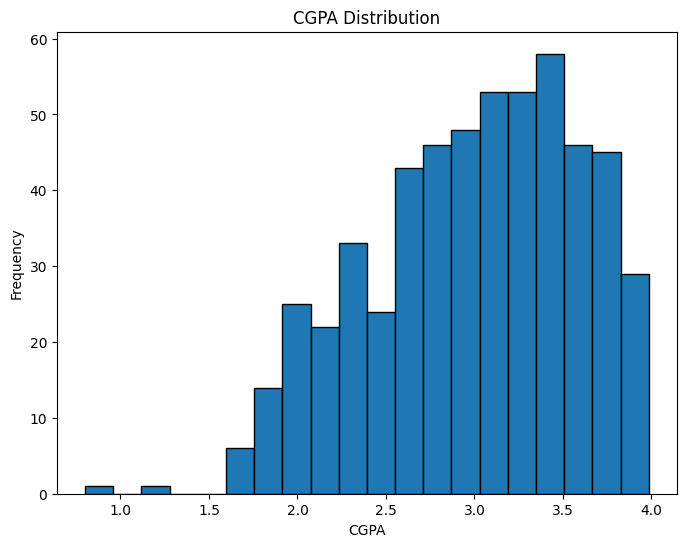

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['CGPA'], bins=20, edgecolor='black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

- Histogram represents shows clusters of scores, indicating common performance ranges among students
- we can see that the distribution is approximately normal, with the majority of students having a CGPA around 3.0. 
- There are also a few students with a CGPA close to 4.0, indicating excellent academic performance

##### Finding out students who scored full marks

In [22]:
num_students_with_5 = (df == 5.0).sum().sum()
print(f'Number of students with 5.0: {num_students_with_5}')

Number of students with 5.0: 715


There are 715 who scored 5.0 out 5.0

### Correaltion map between target variable and independent variables

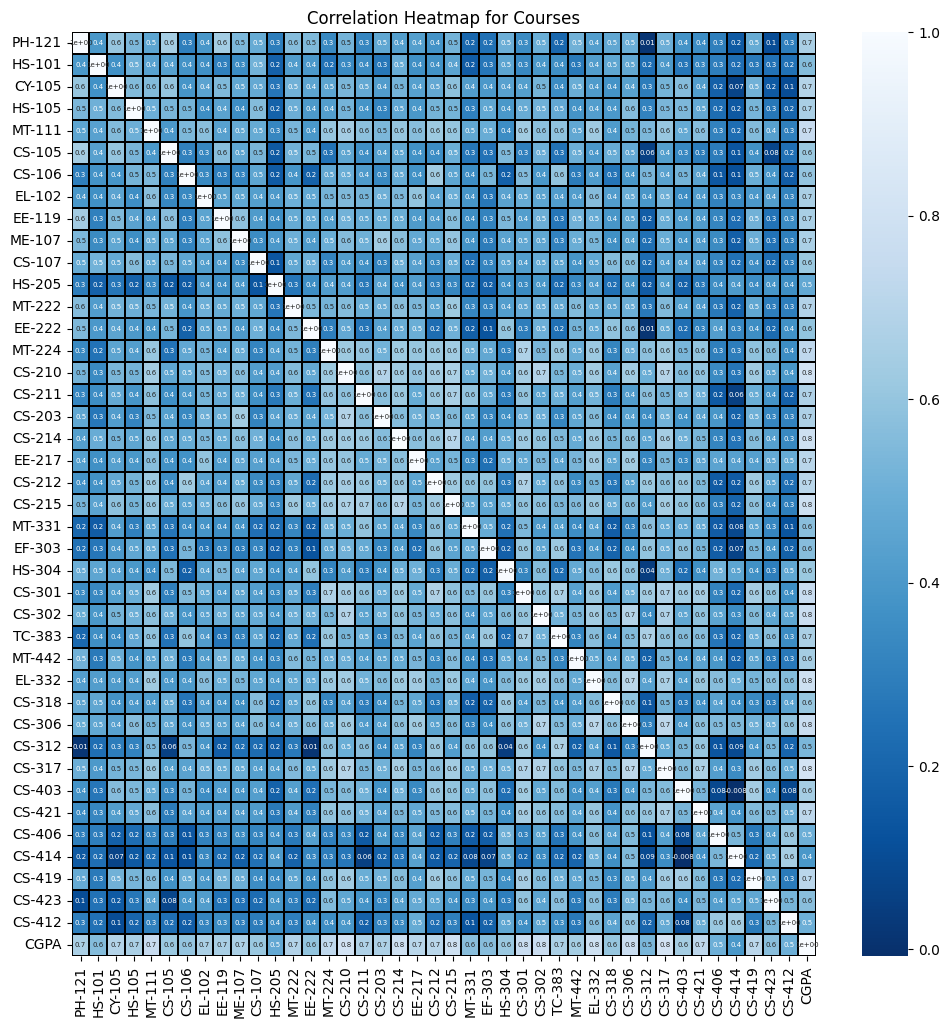

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, fmt = '0.0', linecolor ='black', annot = True,annot_kws={'size':5 }, cmap = 'Blues_r')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap for Courses')
plt.show()

- The correlation heatmap provides a visual representation of how closely related the course grades are to each other
- Each cell in the heatmap shows the correlation coefficient between the courses, indicating the strength and direction of the relationship.
- Eg., The correlation between 'PH-121' and 'CY-105' is approximately 0.62, indicating a strong positive relationship. This means that students who perform well in 'PH-121' also tend to perform well in 'CY-105'.
- Few courses are strongly correlated to CGPA eg., CS-214, CS-215, CS-306 by 80%

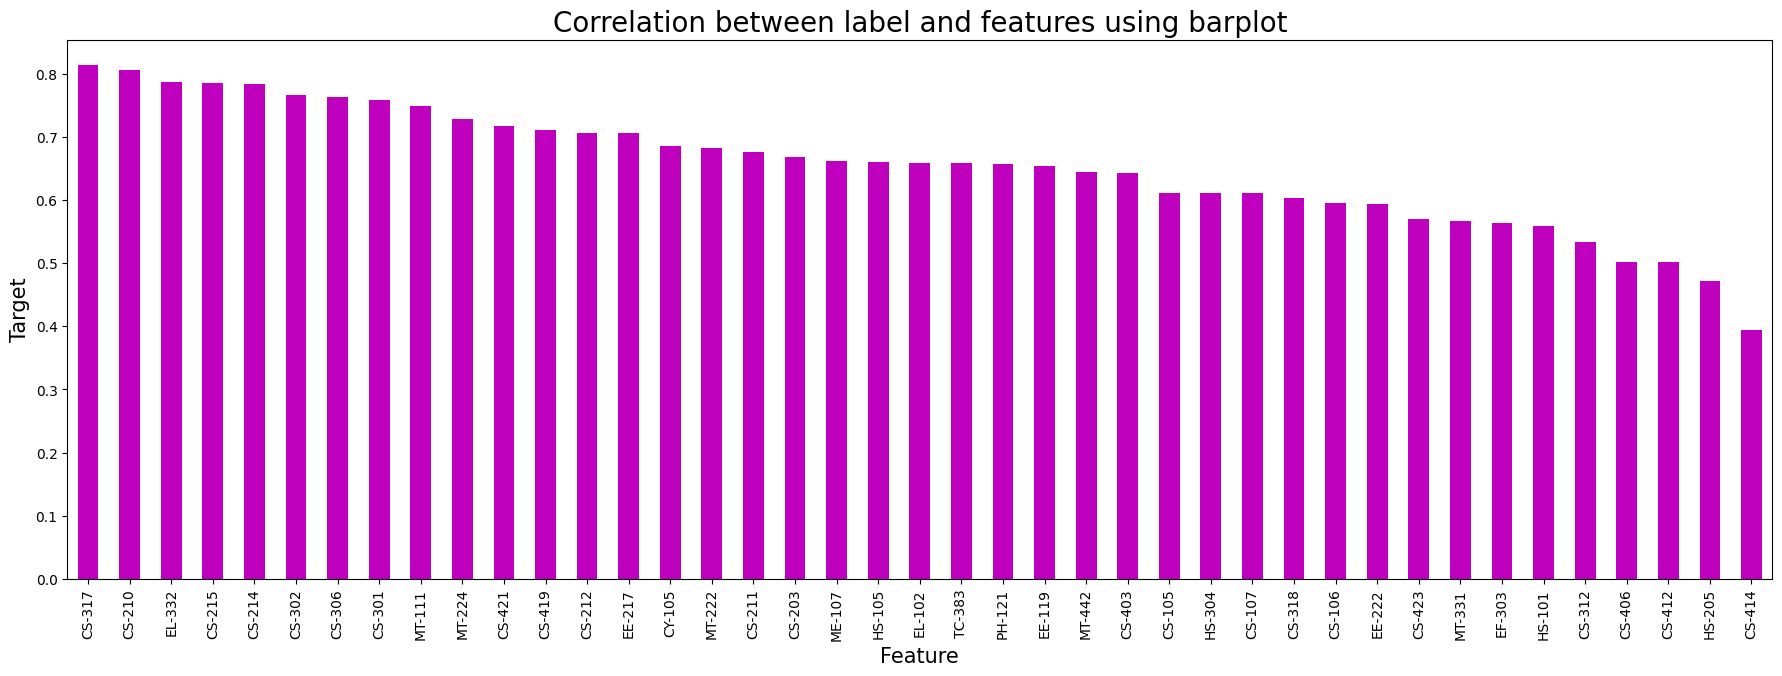

In [24]:
plt.figure(figsize = (22,7))
df.corr()['CGPA'].sort_values(ascending = False).drop(['CGPA']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- The bar plot visualizes the correlation of each feature with the CGPA. 
- Features are sorted by their correlation strength, with the most positively correlated features on the left and the most weakly correlated on the right.
- This visualization helps identify which factors are most strongly associated with higher CGPA scores.

In [25]:
df.corr().CGPA.sort_values()

CS-414    0.394357
HS-205    0.472407
CS-412    0.501255
CS-406    0.502187
CS-312    0.533447
HS-101    0.559068
EF-303    0.563223
MT-331    0.567562
CS-423    0.569854
EE-222    0.594075
CS-106    0.595674
CS-318    0.603967
CS-107    0.611361
HS-304    0.611553
CS-105    0.611999
CS-403    0.643721
MT-442    0.645393
EE-119    0.653827
PH-121    0.657777
TC-383    0.659220
EL-102    0.659221
HS-105    0.660349
ME-107    0.662367
CS-203    0.669171
CS-211    0.676330
MT-222    0.683200
CY-105    0.685212
EE-217    0.705855
CS-212    0.706442
CS-419    0.711955
CS-421    0.716861
MT-224    0.727862
MT-111    0.749406
CS-301    0.758322
CS-306    0.762928
CS-302    0.766428
CS-214    0.783606
CS-215    0.785574
EL-332    0.787414
CS-210    0.805949
CS-317    0.813588
CGPA      1.000000
Name: CGPA, dtype: float64

- The sorted correlation values indicate how each course is related to the overall CGPA.
- Higher values suggest a stronger positive relationship with CGPA, meaning as scores in these courses increase, CGPA tends to increase as well. 
- The courses listed at the top have the strongest positive correlation with CGPA.

### MinMaxScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler

MinMaxScaler()

### Principal Component Analysis

In [27]:
from sklearn.decomposition import PCA

X_var = df[[ 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',]]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,len(var_exp)+1)],
                      columns=["Explained_Variance"])
print(var_df.T)

                      P1    P2    P3   P4    P5   P6    P7    P8    P9  P10  \
Explained_Variance  15.2  2.87  1.81  1.4  0.87  0.7  0.65  0.59  0.51  0.5   

                    ...   P32   P33   P34   P35   P36   P37   P38   P39   P40  \
Explained_Variance  ...  0.18  0.18  0.17  0.17  0.16  0.15  0.14  0.13  0.12   

                     P41  
Explained_Variance  0.11  

[1 rows x 41 columns]


- The table above shows the explained variance for the first principal component (P1), which is 15.2 
- The second principal component (P1), which is 15.2 ...........
- The last principal component (P41), which is 0.11

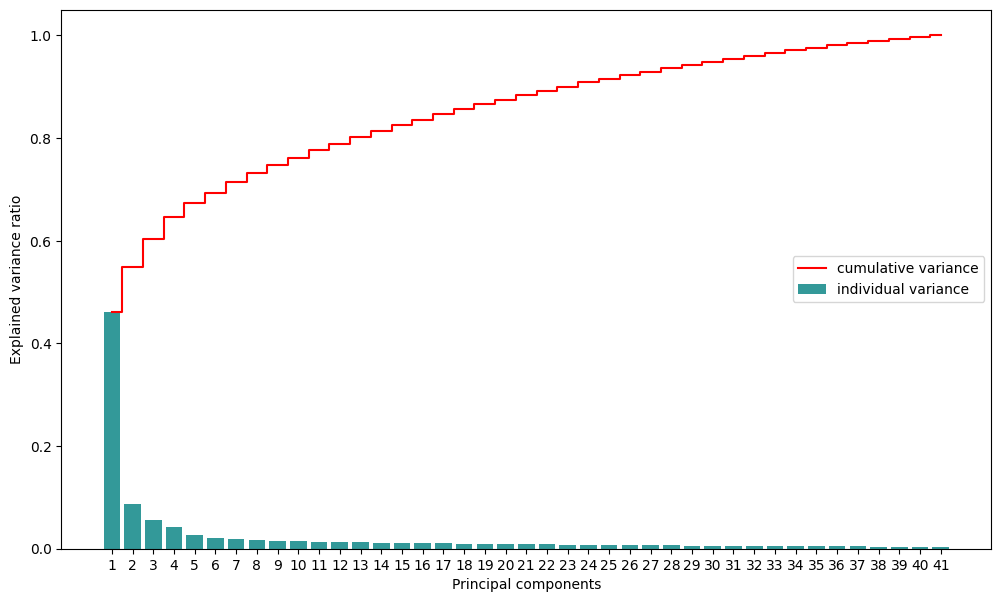

In [28]:
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1, 1))
plt.legend(loc='center right')
plt.show()

- The graph illustrates how each bar explains the variance for a specific principal component'
- The red step line indeed represents the cumulative variance explained by the principal components
- It helps us decide how many components are needed to understand most of the data and  its variance


In [29]:
# Check if the first 31 components capture at least 95% of the variance
cumulative_variance_31 = cum_var_exp[31]  
print(f"Cumulative Variance for 31 components: {cumulative_variance_31}")

pca_red = PCA(n_components=31)
X_reduced = pca_red.fit_transform(X_var)

X_reduced_df = pd.DataFrame(X_reduced, columns=["P" + str(i) for i in range(1, 32)])

Cumulative Variance for 31 components: 0.9599621927920575


- We reduced the dimensionality of the data to 31 principal components. 
- After examining the cumulative explained variance, we found that these 31 components collectively giving total variance of 95.9% for these 31 components.
- This reduction in dimensionality retaining a substantial amount of information from the original dataset.



In [30]:
# Use X_reduced_df for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X_reduced_df.values, i) for i in range(X_reduced_df.shape[1])]
vif['Features'] = X_reduced_df.columns

print(vif)

    VIF values Features
0          1.0       P1
1          1.0       P2
2          1.0       P3
3          1.0       P4
4          1.0       P5
5          1.0       P6
6          1.0       P7
7          1.0       P8
8          1.0       P9
9          1.0      P10
10         1.0      P11
11         1.0      P12
12         1.0      P13
13         1.0      P14
14         1.0      P15
15         1.0      P16
16         1.0      P17
17         1.0      P18
18         1.0      P19
19         1.0      P20
20         1.0      P21
21         1.0      P22
22         1.0      P23
23         1.0      P24
24         1.0      P25
25         1.0      P26
26         1.0      P27
27         1.0      P28
28         1.0      P29
29         1.0      P30
30         1.0      P31


- The VIF values for each principal component in the reduced dataset (X_reduced_df) are consistently 1.0. 
- This suggests no significant multicollinearity among the principal components, indicating that they are relatively independent and suitable for regression analysis.

In [31]:
X = X_reduced_df.columns
y = df["CGPA"].values

- You have created two variables:

- X: This represents the features (in this case, the principal components) of your dataset. It includes columns named "P1" to "P31" from the reduced dataset.

- y: This represents the target variable, which is the CGPA values. It is derived from the "CGPA" column in your original dataset.

In [32]:
X

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31'],
      dtype='object')

In [33]:
y

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.443, 3.133, 3.22 , 3.112, 3.16 , 3.019,
       3.164, 3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.564, 2.468, 3.769, 2.999,
       2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458, 2.34 ,
       3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171, 3.761,
       2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084, 1.89 ,
       3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396, 3.772, 1.768,
       3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 3.195, 2.3  , 3.759,
       3.516, 2.087, 3.137, 2.011, 2.566, 2.999, 1.993, 3.334, 2.056,
       2.552, 2.028, 3.189, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 ,
       2.208, 2.698,

In [34]:
y.shape

(547,)

#### Checking for outliers

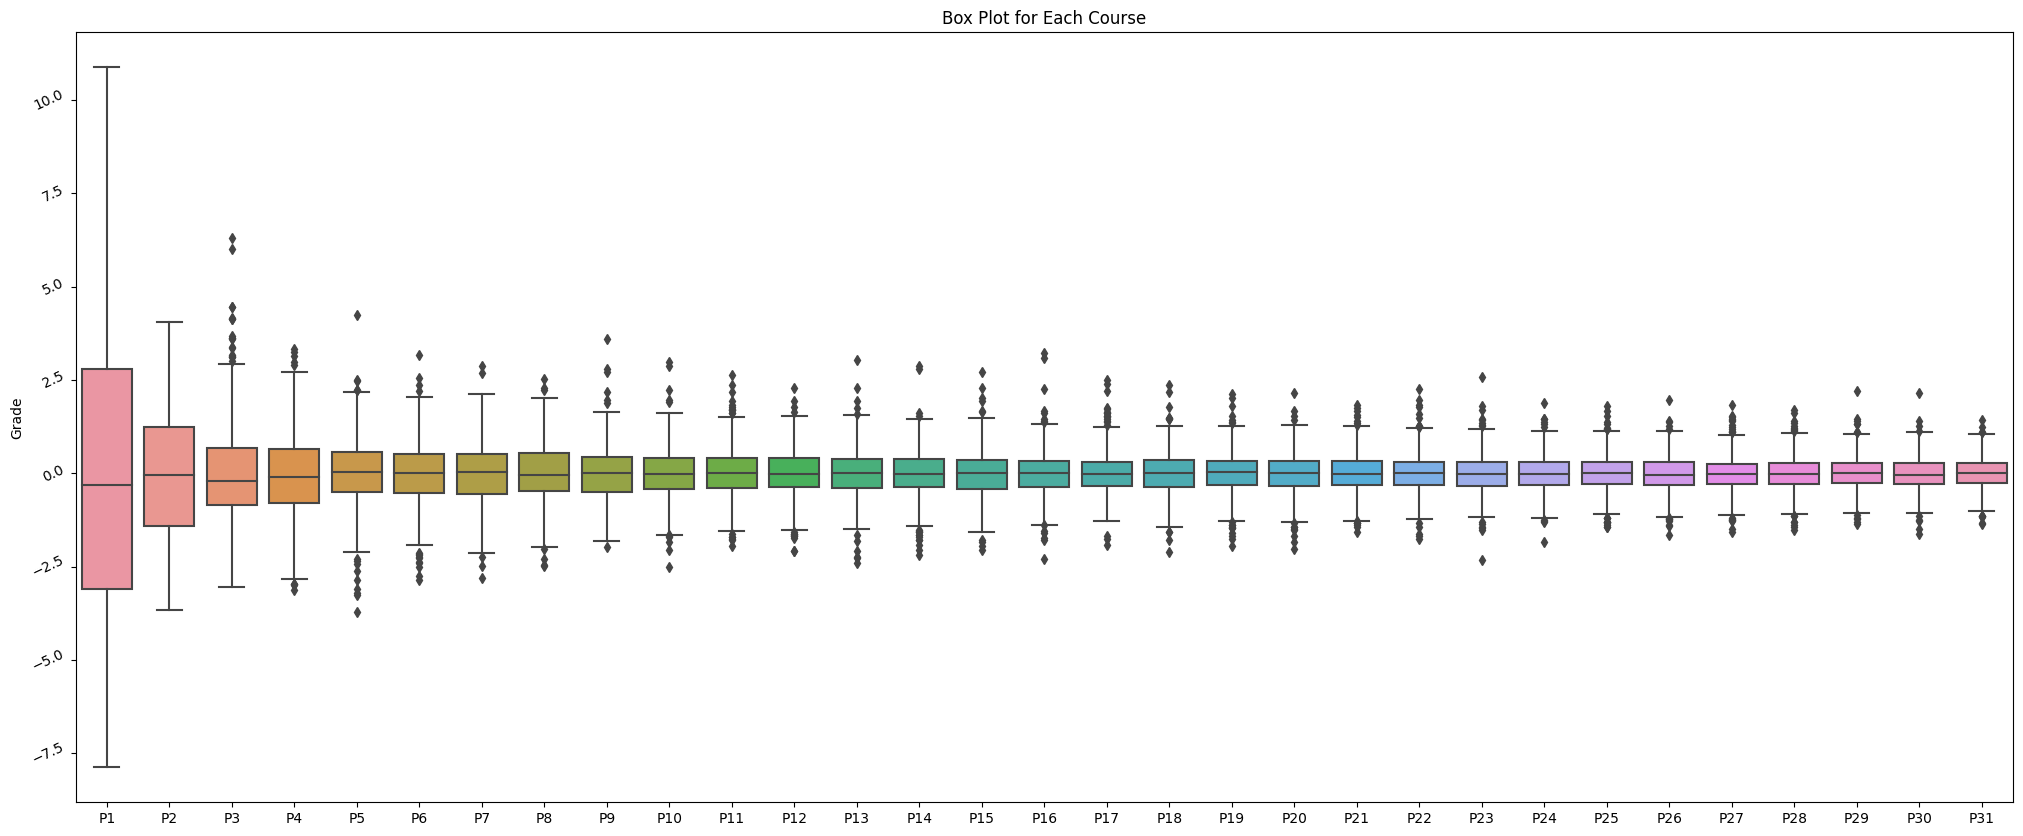

In [35]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=X_reduced_df)
plt.title('Box Plot for Each Course')
plt.ylabel('Grade')
plt.yticks(rotation=25,va='center')
plt.show()

- The box plot visualizes the distribution of grades (represented by principal components) for each course after PCA. 
- Each box represents the interquartile range (IQR) of the data, with the central line indicating the median. 
- Outliers are displayed as individual points outside the whiskers.
- The graph helps identify the variability and potential outliers in the grades across different courses, contributing to a clearer understanding of the distribution of principal components.

In [36]:
def cap_outliers(X):
    for col in X.columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

       
        lower_bound = Q1 - outlier_step
        X[col][X[col] < lower_bound] = lower_bound

       
        upper_bound = Q3 + outlier_step
        X[col][X[col] > upper_bound] = upper_bound

    return X


X_reduced_df = cap_outliers(X_reduced_df)

- The cap_outliers function is designed to cap outliers in each column of a DataFrame using the IQR (Interquartile Range) method
- It ensures that extreme values do not disproportionately influence the analysis.
- This preprocessing step contributes to a more robust and reliable interpretation of the data

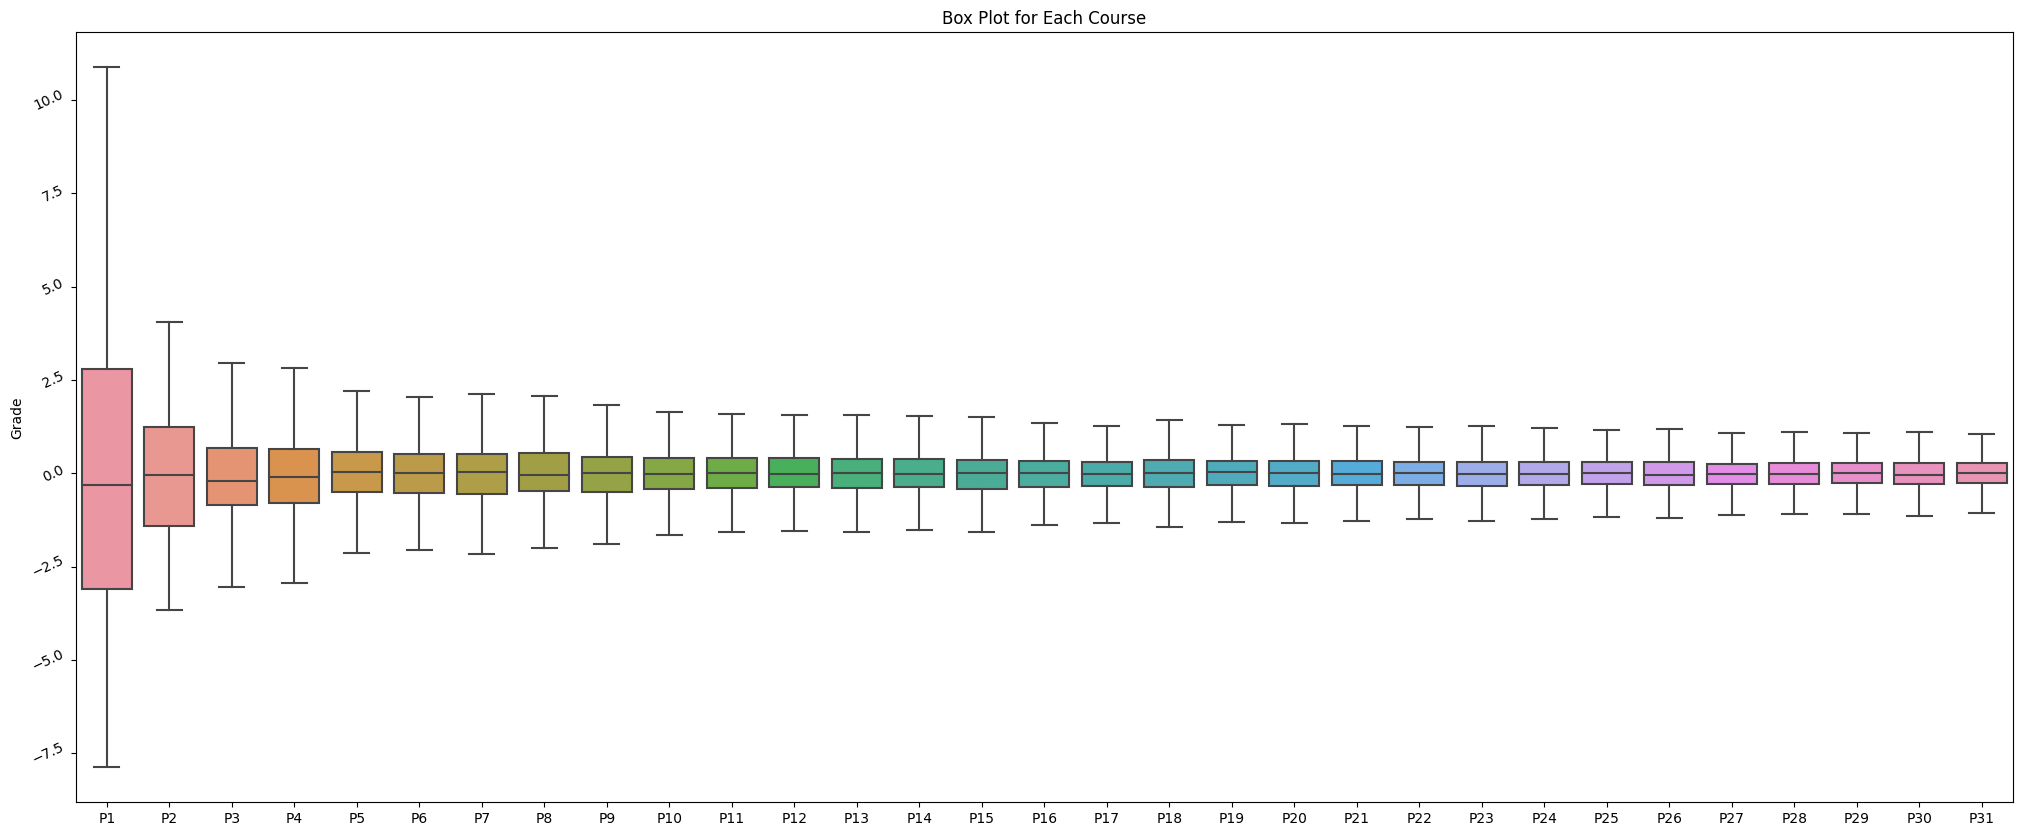

In [37]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=X_reduced_df)
plt.title('Box Plot for Each Course')
plt.ylabel('Grade')
plt.yticks(rotation=25,va='center')
plt.show()

We efficiently removed the outliers

In [38]:
X_reduced_df.shape

(547, 31)

In [39]:
x = X_reduced_df
x

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,5.710666,-0.829275,-2.446673,0.735022,-0.753368,1.094772,0.646148,0.232044,0.263301,-0.184808,...,0.350613,-0.628199,-0.995661,1.174262,1.006490,-0.093597,0.104222,0.046534,-0.330868,-0.457858
1,6.580505,-1.175554,-0.638646,-0.191819,1.651907,0.941475,0.158300,0.170514,-1.784253,1.613655,...,-0.988681,0.695657,-0.067709,0.320872,0.498928,0.424188,-1.097559,-0.693737,-0.740435,-1.070992
2,-3.946223,-0.943768,0.092404,1.857630,0.169330,0.022798,0.396897,-0.716032,0.968037,-0.104590,...,-0.904410,0.063512,-0.482408,0.361478,-0.065864,0.056728,-0.196750,-0.028374,0.258138,-0.052649
3,7.561554,-1.134446,-0.704905,0.712314,0.948613,-1.257702,0.146838,-1.732473,0.597744,-0.158890,...,0.104691,0.145371,0.242061,0.233442,-1.192495,-0.067711,-0.114895,-0.017429,0.532362,1.066201
4,-2.783602,-1.497771,-0.297203,1.242140,-0.054226,1.075701,-1.617110,-0.242821,0.955684,-0.532383,...,-0.476942,-0.148254,0.625874,-0.385482,-0.259397,-0.219865,0.444686,0.415143,0.196210,-0.183098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-5.650468,-0.302852,0.051219,-0.053442,0.846142,-0.371316,0.573377,-0.537409,-0.506621,-0.471536,...,-0.057239,0.345063,0.020718,-0.347731,0.128090,0.200358,0.655875,0.697654,0.505484,0.111807
543,-5.426162,-0.384476,1.099824,-0.540507,-0.098927,-1.907667,-0.501671,-0.470249,-0.771168,0.480707,...,0.700563,0.612642,-0.026933,0.374227,1.074527,0.979227,0.184857,0.226387,0.558808,-0.095423
544,-3.147692,1.048237,0.866309,-0.754677,0.913141,-0.667025,-0.330314,0.492225,-0.694237,-0.512409,...,-0.521499,-0.491330,0.129734,0.382429,0.411598,0.285572,-0.386533,0.994478,-0.056085,0.144416
545,4.665467,-0.212242,1.370780,-1.737761,-0.026865,-0.136712,-1.104198,-0.575110,0.871910,0.744294,...,0.460782,-0.744858,-0.984003,-0.828356,0.772985,0.028348,0.264779,1.080754,0.338248,0.572156


We renamed the X_reduced_df as x

### Analyzing out top 31 features using histogram

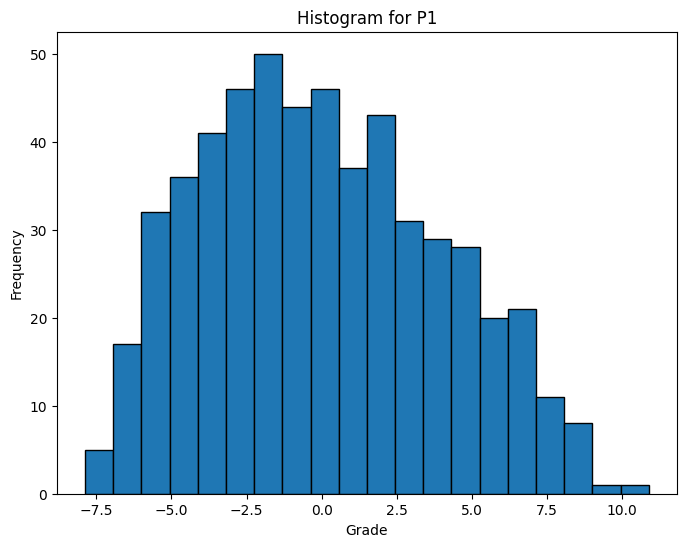

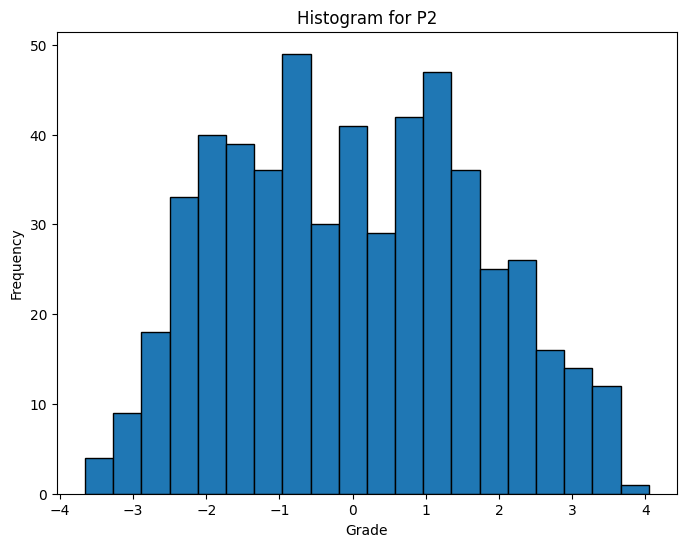

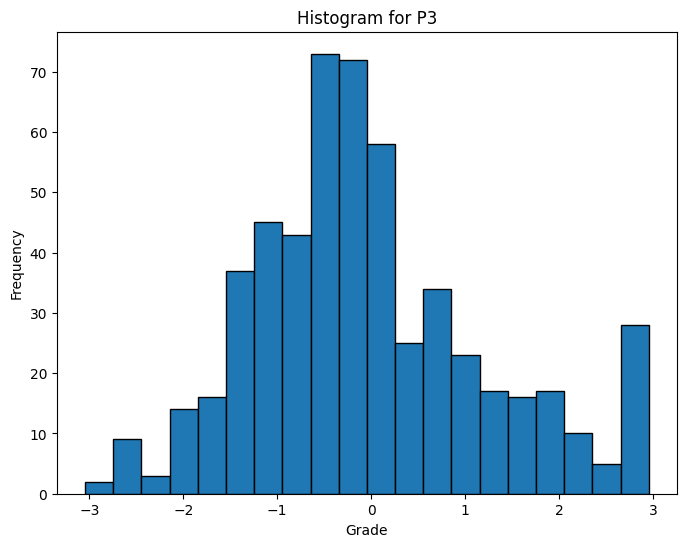

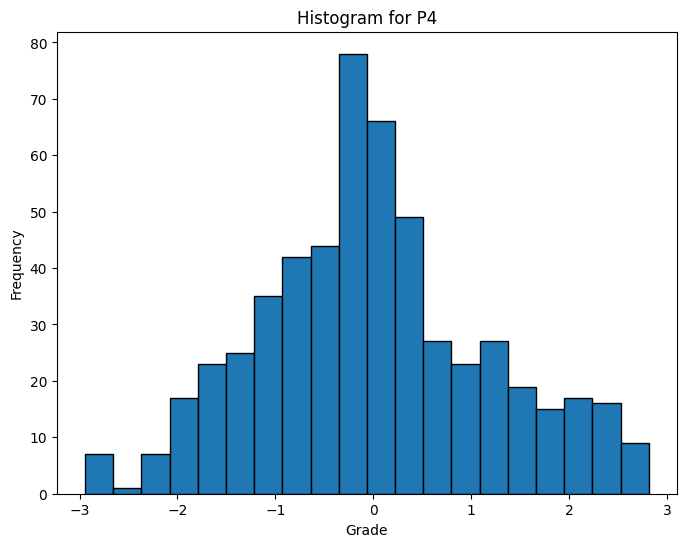

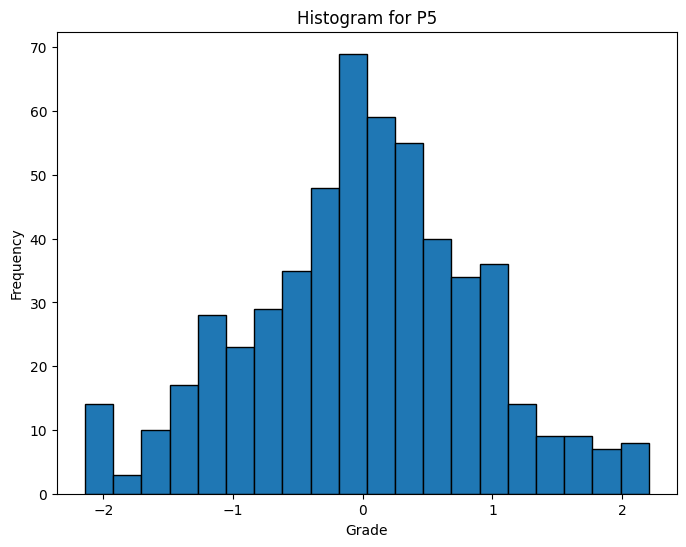

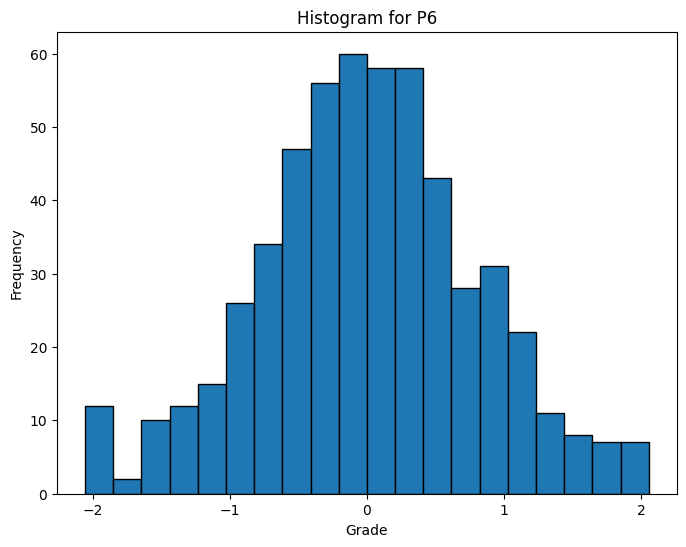

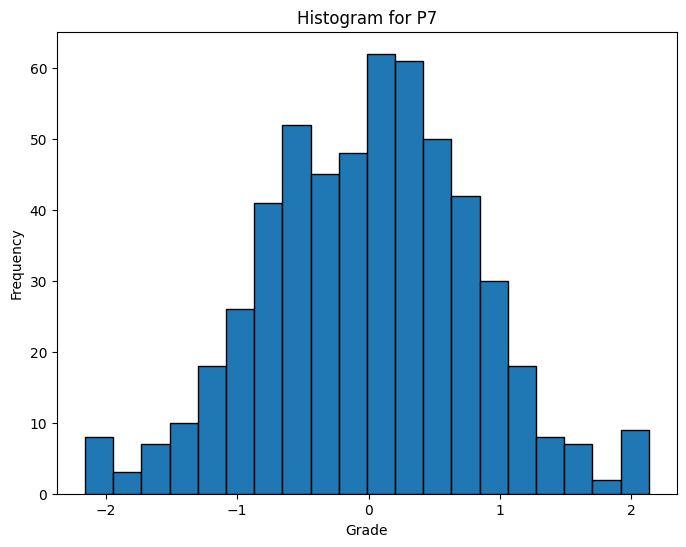

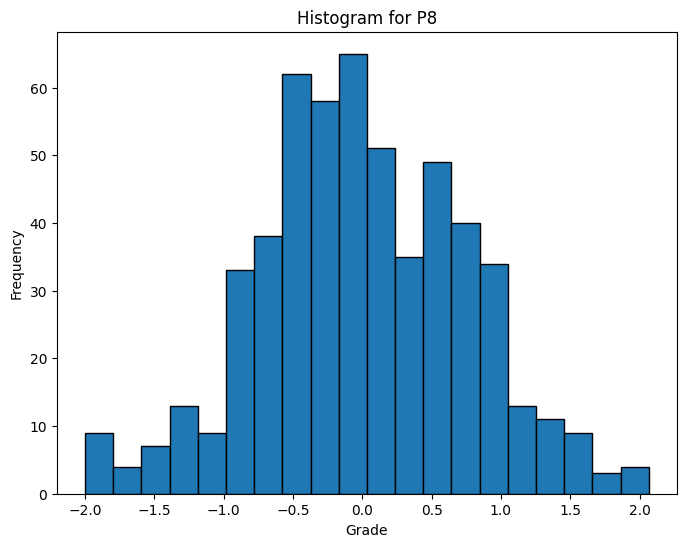

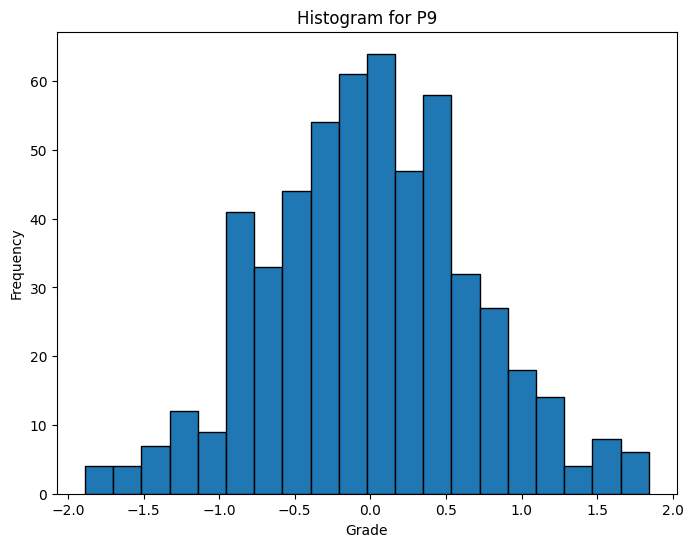

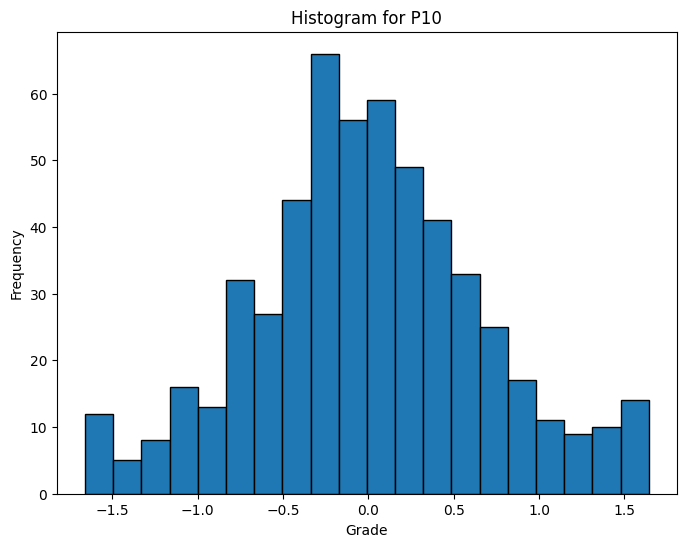

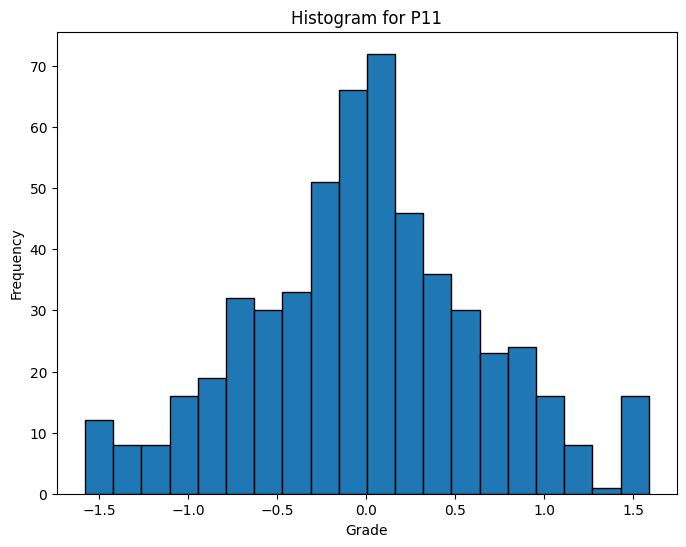

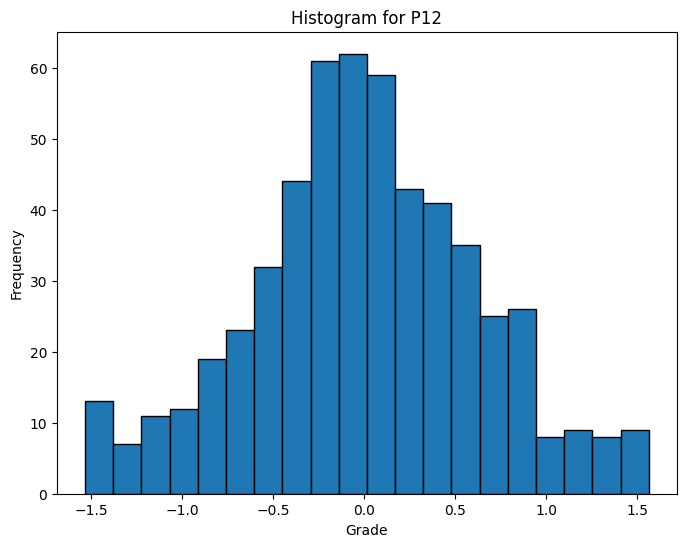

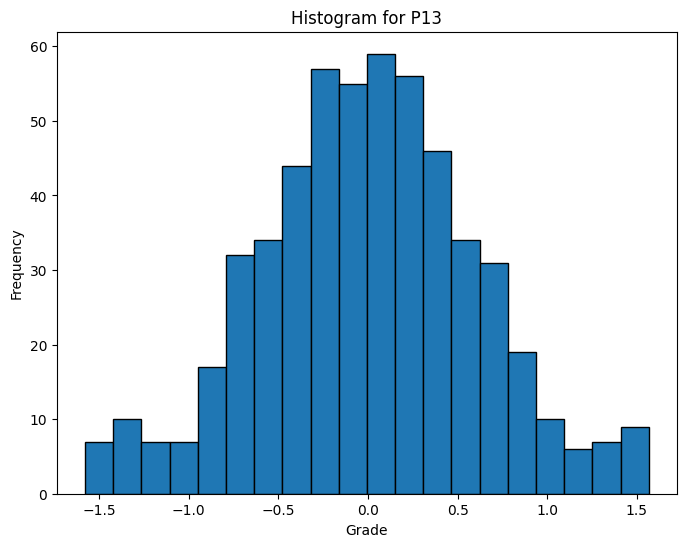

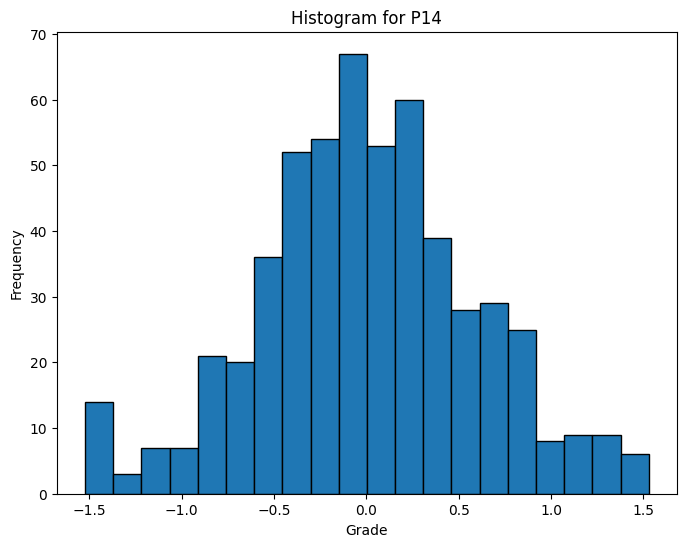

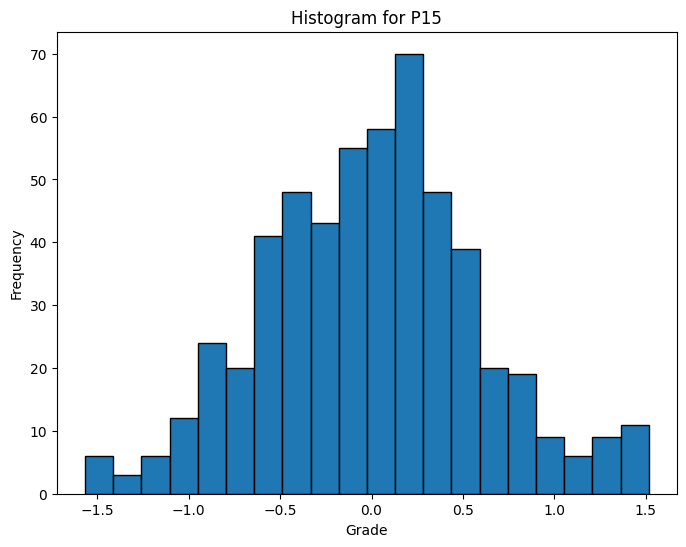

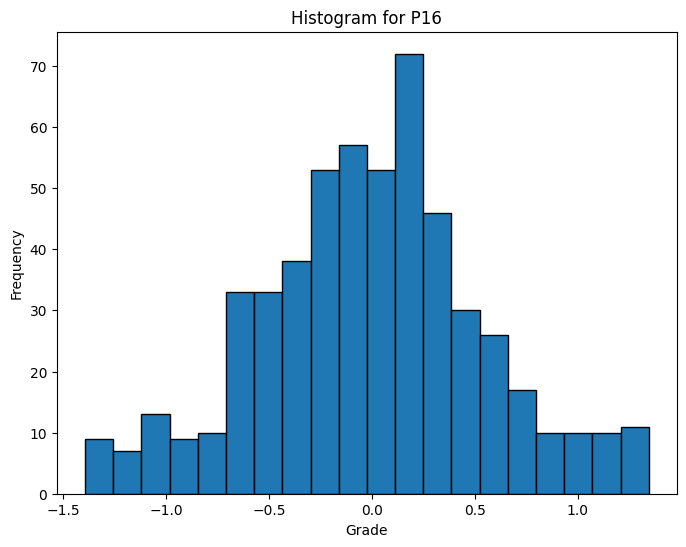

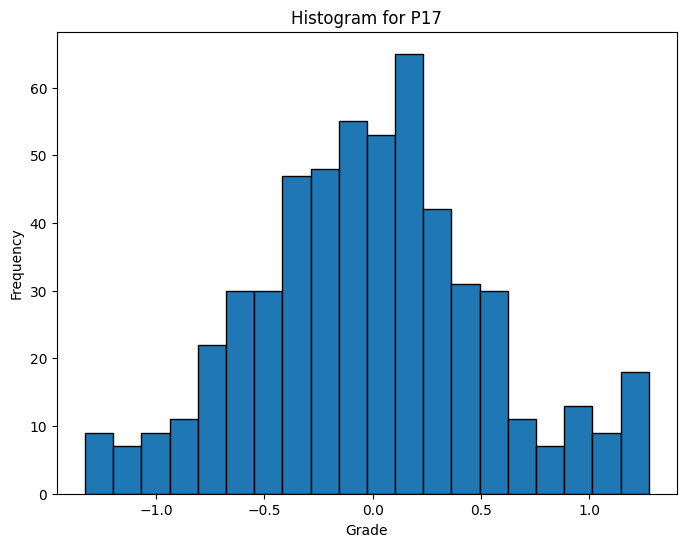

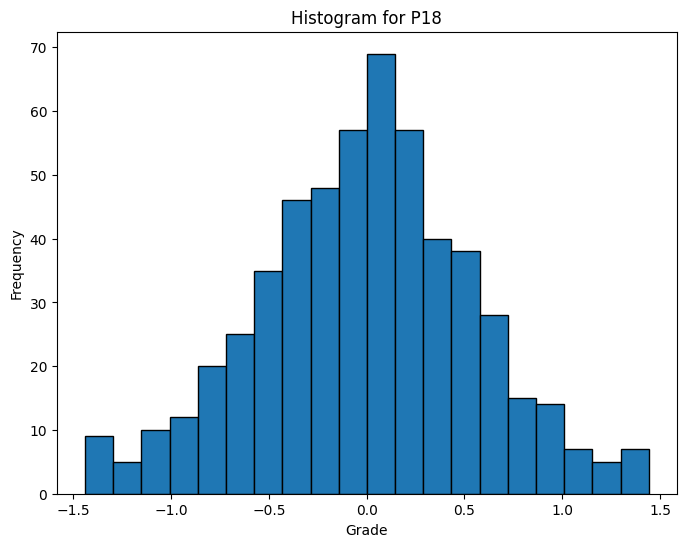

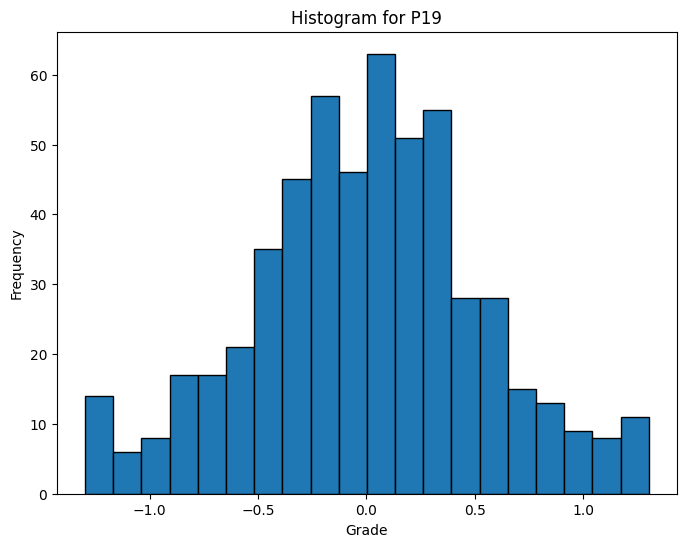

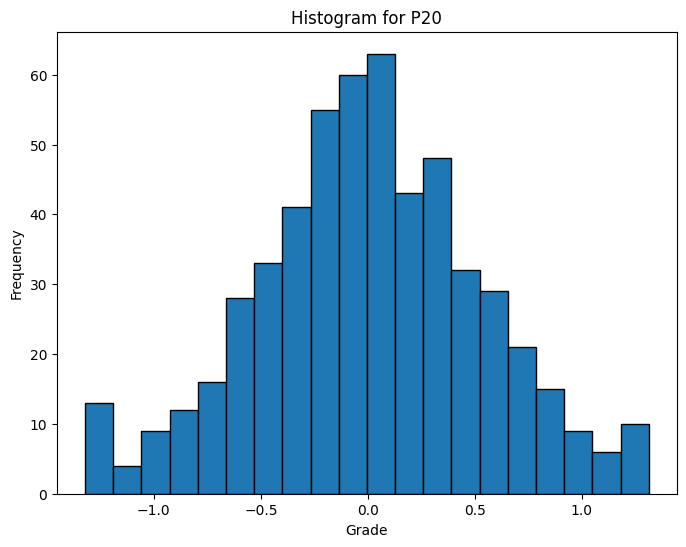

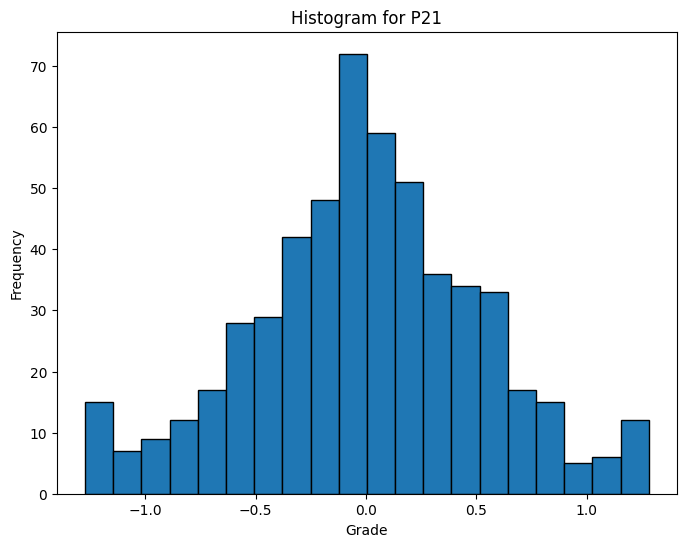

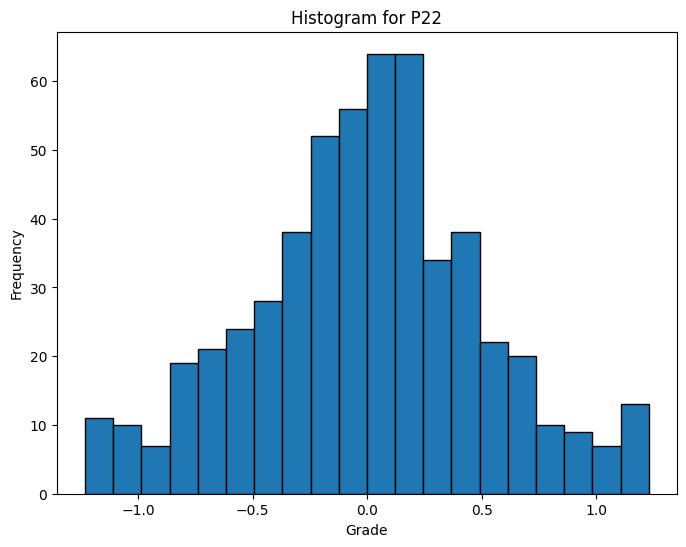

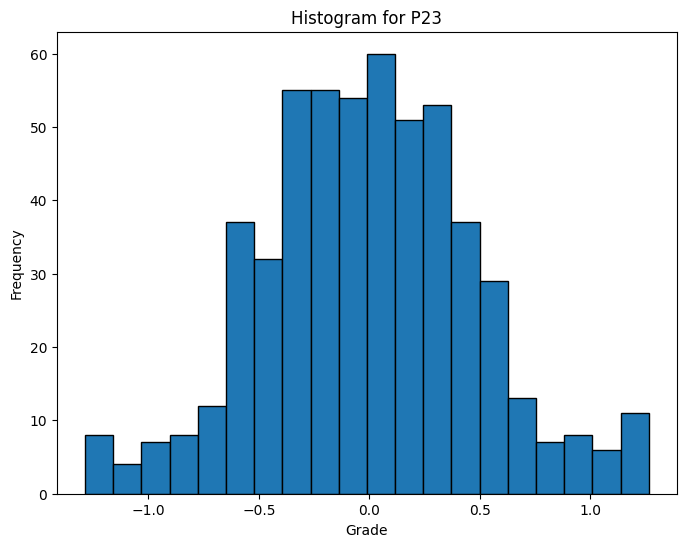

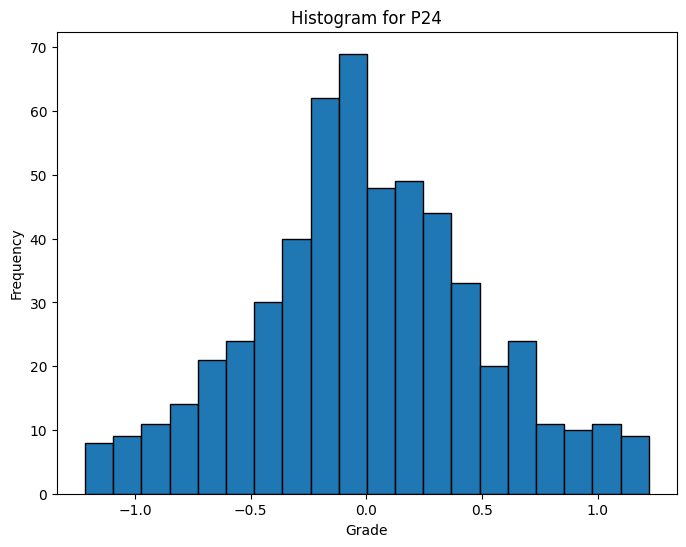

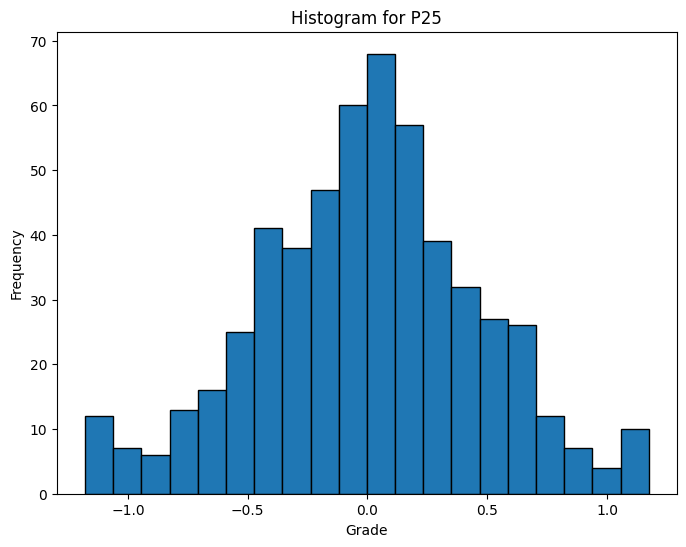

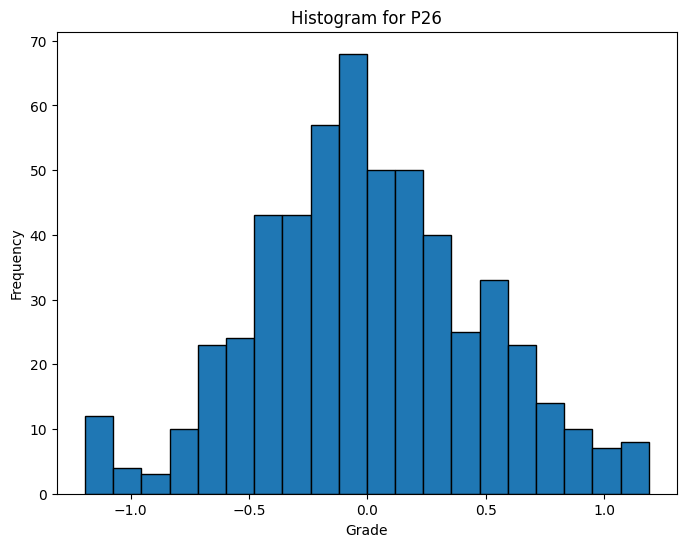

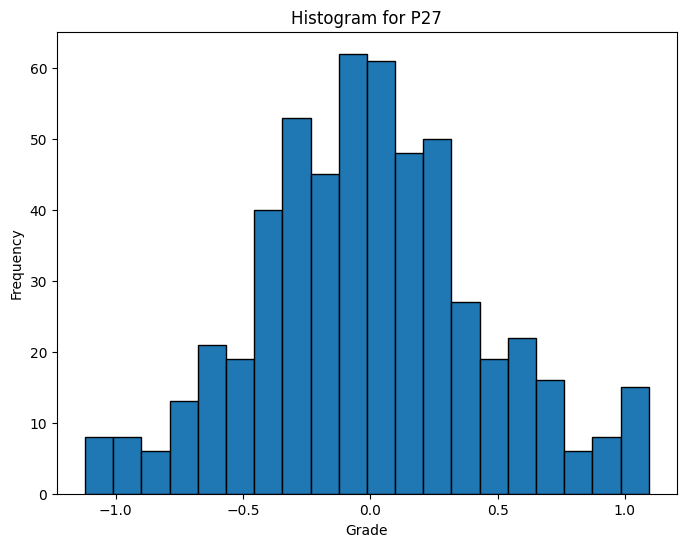

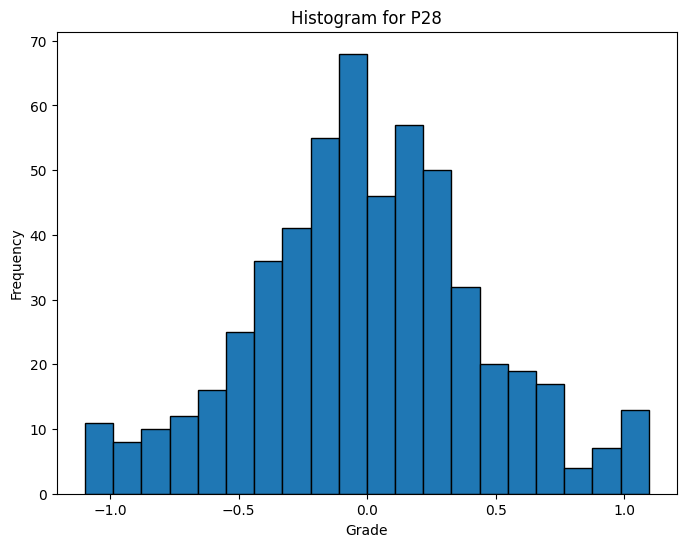

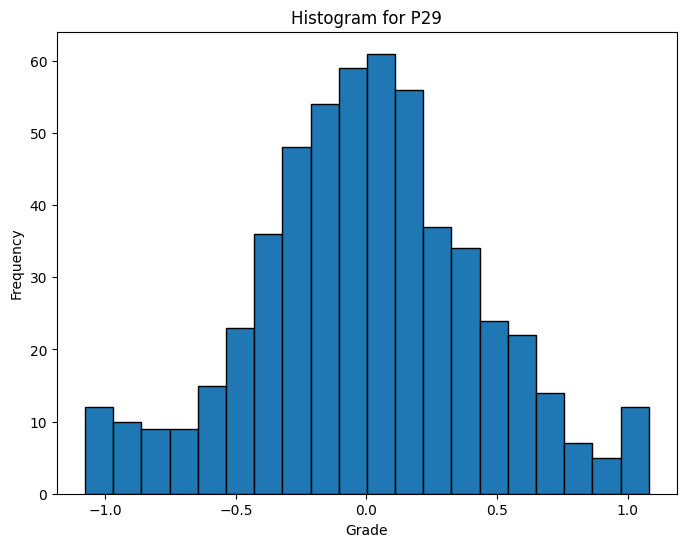

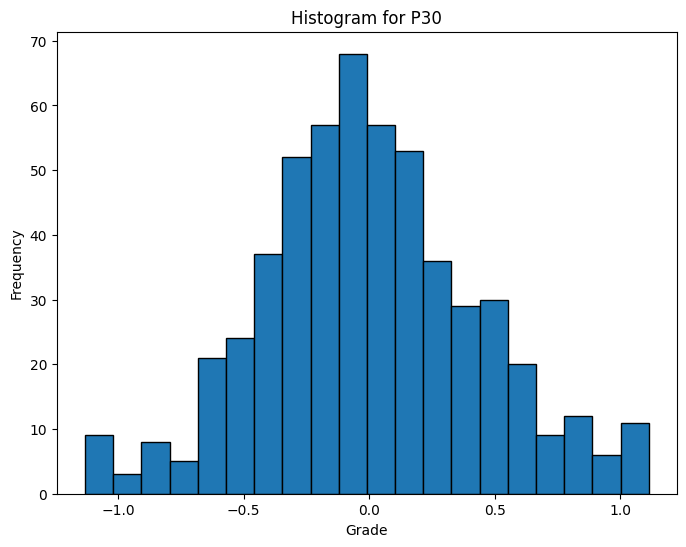

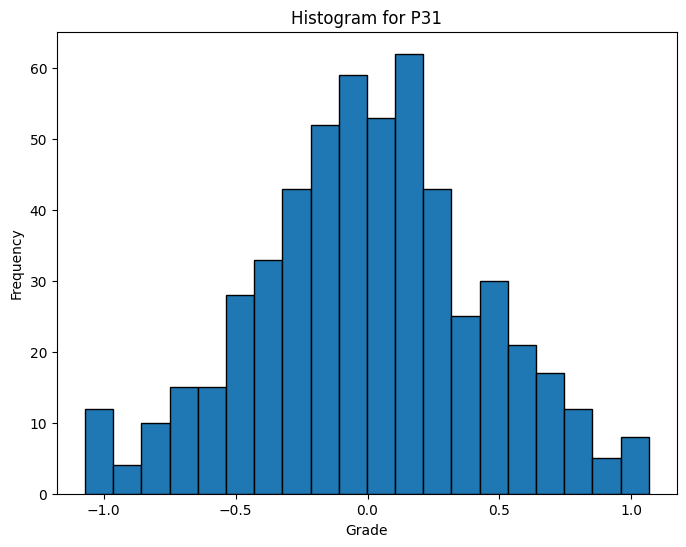

In [40]:
x = X_reduced_df.columns
for col in x:
    plt.figure(figsize=(8, 6))
    plt.hist(X_reduced_df[col], bins=20, edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel('Grade')
    plt.ylabel('Frequency')
    plt.show()


- The histograms show the distribution of grades for each principal component.
- The x-axis represents the grade values, and the y-axis represents the frequency of each grade.
- We can see the patterns for every specific character in the histograms.
- We can evaluate  the distribution of grades for each principal component, provides insights into the underlying data patterns.

In [41]:
X_reduced_df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
count,5.470000e+02,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,-4.156740e-16,-2.078370e-16,-0.031622,-0.002422,0.007087,0.002341,-0.000437,0.000719,-0.007372,-0.004091,...,-0.003590,-0.001889,-0.001134,-0.001136,-0.000329,-0.003074,-0.001163,-0.002872,-0.000675,0.000447
std,3.899210e+00,1.694386e+00,1.251425,1.175031,0.881436,0.805104,0.796056,0.754917,0.687674,0.675891,...,0.506664,0.484125,0.498582,0.471849,0.471997,0.453063,0.446817,0.436283,0.433514,0.433851
min,-7.874499e+00,-3.655544e+00,-3.044739,-2.943570,-2.140138,-2.055583,-2.157288,-1.998968,-1.886652,-1.660611,...,-1.230564,-1.287209,-1.215917,-1.178700,-1.192495,-1.119938,-1.097559,-1.077611,-1.131139,-1.070992
25%,-3.091441e+00,-1.411889e+00,-0.853957,-0.784666,-0.510768,-0.513453,-0.548980,-0.474623,-0.488893,-0.421952,...,-0.308397,-0.329798,-0.302059,-0.296339,-0.299444,-0.289891,-0.275288,-0.268224,-0.289514,-0.269545
50%,-3.226708e-01,-5.055726e-02,-0.193158,-0.085605,0.023330,-0.002210,0.027104,-0.046865,-0.003446,-0.023404,...,0.008674,-0.007458,-0.016847,0.012928,-0.032182,-0.015126,-0.010012,-0.002557,-0.031504,0.001651
75%,2.807401e+00,1.253607e+00,0.669488,0.654604,0.575479,0.514634,0.523226,0.541608,0.442947,0.403821,...,0.306380,0.308477,0.307180,0.291902,0.295924,0.263474,0.272893,0.271367,0.271569,0.264753
max,1.087913e+01,4.047404e+00,2.954655,2.813509,2.204849,2.056764,2.131535,2.065953,1.840707,1.642480,...,1.228546,1.265889,1.221039,1.174262,1.188976,1.093522,1.095165,1.080754,1.113194,1.066201


- The summary statistics for the P1 to P31 columns are as follows:
- The count of entries is 547

### Modelling

#### Finding the best random_state

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [43]:
# Assuming X_reduced_df is your DataFrame with the principal components

x = X_reduced_df
y = df["CGPA"].values

maxAccu = 0
maxRs = 0  

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    
    # Make sure to reshape y_train and y_test to match the number of samples
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print('Maximum r2score is', maxAccu, 'on random_state', maxRS)


Maximum r2score is 0.992924070275974 on random_state 64


In [44]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=maxRS)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

### LinearRegression

In [46]:
# Checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_LR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 96.02861588288107
R2_score on training data: 0.9896900164043727
Mean Absolute Error: 0.04570366271570572
Mean Squared Error: 0.003410397857239881
Root Mean Squared Error: 0.0583986117749376


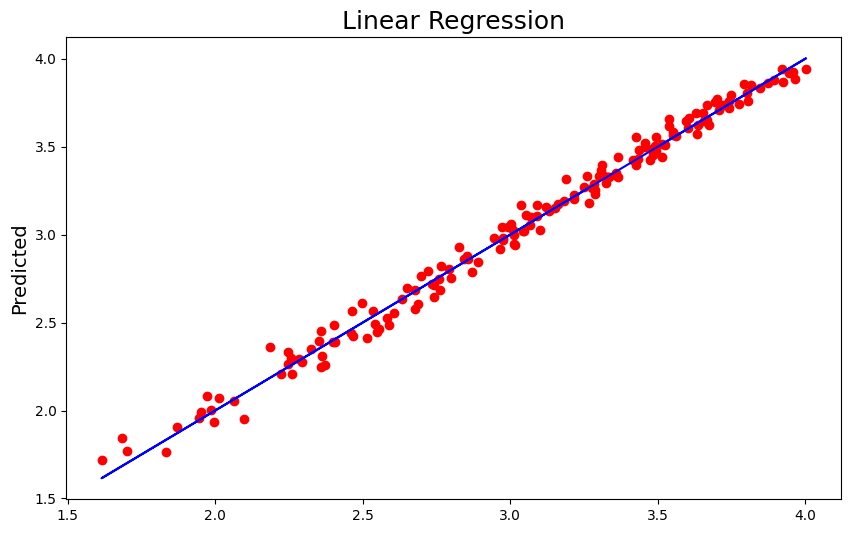

In [47]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_LR, y=y_test, color = 'r')
plt.plot(pred_LR,pred_LR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

### RandomForestRegressor

In [48]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_RFR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 98.79863506692507
R2_score on training data: 0.9913587701367146
Mean Absolute Error: 0.037095939393939584
Mean Squared Error: 0.002858397546060603
Root Mean Squared Error: 0.053463983634411336


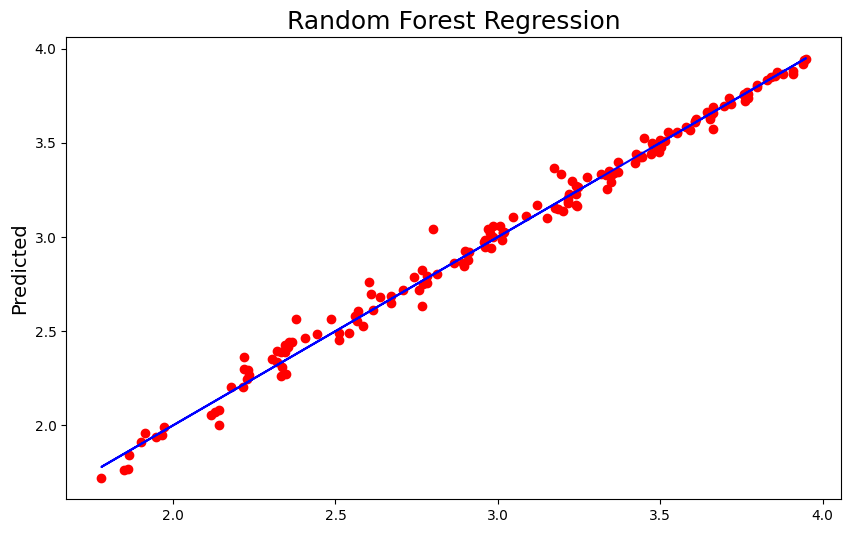

In [49]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_RFR, y=y_test, color = 'r')
plt.plot(pred_RFR,pred_RFR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Random Forest Regression', fontsize = 18)
plt.show()

### ExtraTreesRegressor

In [50]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_ETR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score: 100.0
R2_score on training data: 0.9948898525699804
Mean Absolute Error: 0.02903648484848483
Mean Squared Error: 0.0016903650412121128
Root Mean Squared Error: 0.04111404919503931


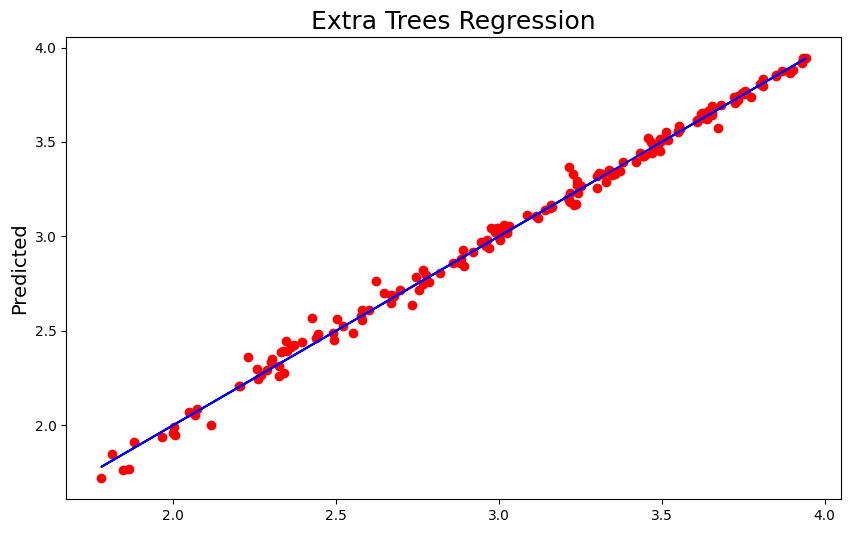

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_ETR, y=y_test, color = 'r')
plt.plot(pred_ETR,pred_ETR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Extra Trees Regression', fontsize = 18)
plt.show()

### RidgeRegressor

In [52]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_rd))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 96.02852502150387
R2_score on training data: 0.9898263581589284
Mean Absolute Error: 0.0453956068505219
Mean Squared Error: 0.0033652979185953683
Root Mean Squared Error: 0.05801118787436927


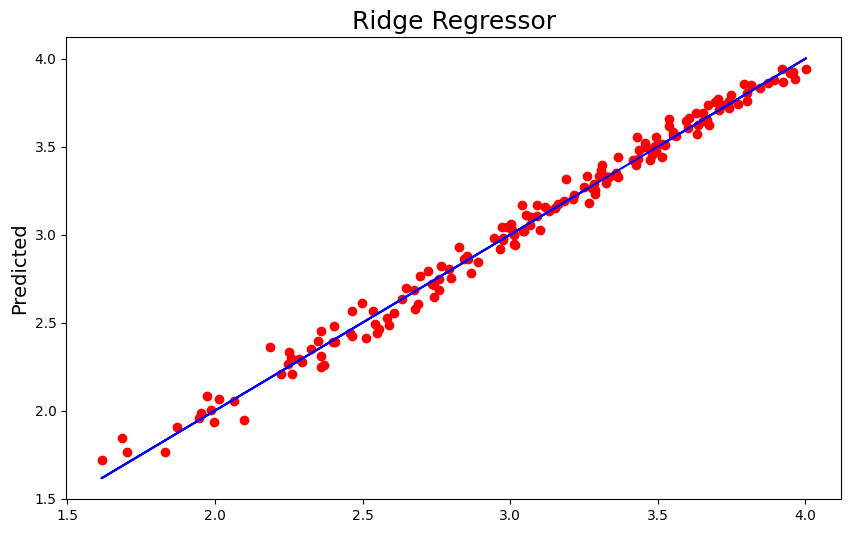

In [53]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_rd, y=y_test, color = 'r')
plt.plot(pred_rd,pred_rd,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Ridge Regressor', fontsize = 18)
plt.show()

### SupportVectorRegressor

In [54]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on training data:',r2_score(y_test,pred_svr))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 97.75348984159008
R2_score on training data: 0.9820037927522075
Mean Absolute Error: 0.05802736415859626
Mean Squared Error: 0.0059528927536166695
Root Mean Squared Error: 0.07715499176084895


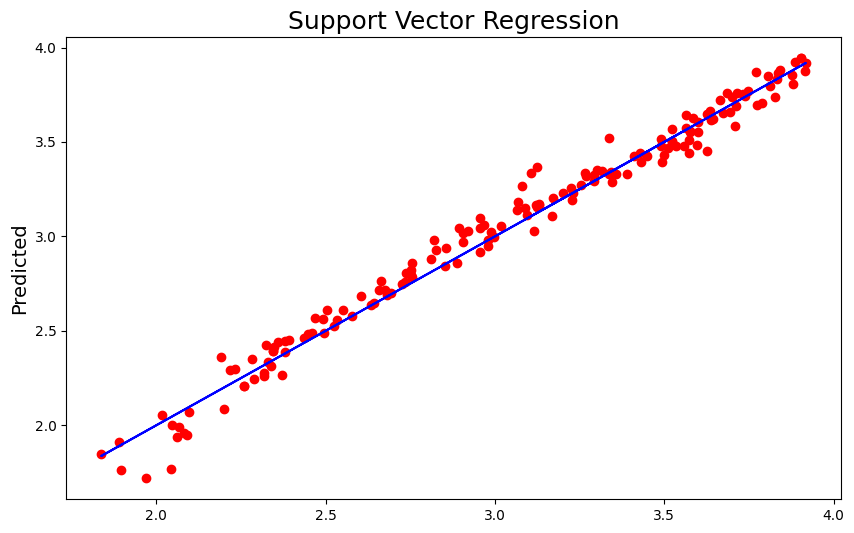

In [55]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_svr, y=y_test, color = 'r')
plt.plot(pred_svr,pred_svr,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title(' Support Vector Regression ', fontsize = 18)
plt.show()

### Cross Validation Score

In [56]:
from sklearn.model_selection import cross_val_score

### Linear Regression

In [57]:
score = cross_val_score(LR,x,y, cv=5, scoring ='r2')
print(score)
print('Linear Regression:',score.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.97715806 0.98543365 0.97642457 0.98359392 0.84043732]
Linear Regression: 0.9526095045859154
Difference between R2 score and cross validation is:  3.7080511818457285


### Random Forest Regressor

In [58]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print('Random Forest Regressor:',score1.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.96752188 0.98469022 0.98412985 0.98998178 0.84269346]
Random Forest Regressor: 0.9538034369326629
Difference between R2 score and cross validation is:  3.755533320405169


### Extra Trees Regressor

In [59]:
score2 = cross_val_score(ETR,x,y)
print(score2)
print('Extra Trees Regressor:',score2.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_ETR)-score2.mean())*100)

[0.97688069 0.98862927 0.98774642 0.99190296 0.85129639]
Extra Trees Regressor: 0.9592911455080644
Difference between R2 score and cross validation is:  3.5598707061916035


### Ridge Regression

In [60]:
score3 = cross_val_score(rd,x,y)
print(score3)
print('Ridge Regression:',score3.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_rd)-score3.mean())*100)

[0.97733831 0.985597   0.97657452 0.9837468  0.84049557]
Ridge Regression: 0.9527504402562222
Difference between R2 score and cross validation is:  3.7075917902706146


### Support Vector Regressor

In [61]:
score4 = cross_val_score(svr,x,y)
print('Support Vector Regression:',score4)
print(score4.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score4.mean())*100)

Support Vector Regression: [0.93761552 0.9805734  0.96959518 0.96907499 0.8711479 ]
0.9456013992437022
Difference between R2 score and cross validation is:  3.640239350850527


### Compare accuracy of models

In [62]:
# Compare accuracy of models
pd.DataFrame([['Linear Regression',score.mean()*100],['Ridge Regression',score3.mean()*100],['Support Vector Regressor',score4.mean()*100],['Extra Tree Regressor',score2.mean()*100],
              ['Random Forest Regressor',score1.mean()*100]],
              columns=['Models','Accuracy'])

,Models,Accuracy
0,Linear Regression,95.260950
1,Ridge Regression,95.275044
2,Support Vector Regressor,94.560140
3,Extra Tree Regressor,95.929115
4,Random Forest Regressor,95.380344


- The best model is ExtraTreesRegressor

### Hyperparameter Tuning

In [63]:
ETR = ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, 
                                   min_samples_split=2, min_samples_leaf=1, 
                                   max_features= 32, bootstrap=True, random_state=64)

ETR.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=True, criterion='friedman_mse', max_features=32,
                    random_state=64)

In [64]:
# Make predictions
pred = ETR.predict(x_test)

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [32]  # You can set it to the number of principal components
}

In [67]:
# Create the Extra Trees Regressor
et_regressor = ExtraTreesRegressor(random_state=64)

# Create GridSearchCV object
grid_search = GridSearchCV(et_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [68]:
# Fit the model to your data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=64), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20], 'max_features': [32],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [69]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 32, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
best_model = grid_search.best_estimator_
best_model

ExtraTreesRegressor(max_depth=10, max_features=32, min_samples_leaf=2,
                    random_state=64)

In [71]:
# Make predictions on the test set using the best model
predictions = best_model.predict(x_test)
predictions

array([3.34932081, 3.20932233, 1.98044119, 3.60546313, 2.45820359,
       2.31800754, 2.38446687, 2.64792363, 2.96216298, 2.07611982,
       1.94914469, 3.21181731, 3.01169224, 3.04492411, 2.35967641,
       2.92594183, 3.92021021, 3.22679519, 3.36350911, 2.46273077,
       2.8420711 , 2.75281747, 2.78458169, 3.52015134, 3.472811  ,
       3.00262055, 3.45426653, 3.63814338, 2.72852332, 2.32012543,
       1.87210864, 3.48873891, 3.7491486 , 1.99929672, 3.53924218,
       3.67713538, 3.21197813, 3.65871727, 2.57501161, 3.53892325,
       3.36051691, 2.99833248, 2.31344261, 2.73711608, 3.93911484,
       3.84534201, 3.741811  , 3.62254375, 2.51168833, 2.59438725,
       1.83623331, 2.99304582, 3.79873537, 3.08612154, 3.28724043,
       3.72819358, 3.90009211, 2.31308451, 2.19524354, 1.89540016,
       2.29322151, 3.89061805, 2.68087099, 3.0517354 , 3.41378919,
       3.17176479, 2.28438209, 3.44876798, 3.22285903, 3.49802615,
       2.23656538, 3.33672703, 3.63877392, 3.19471428, 2.43004

### Calculate the metrics

In [72]:
print('R2_score:',r2_score(y_test,predictions))
print('Mean Absolute Error:',mean_absolute_error(y_test,predictions))
print('Mean Squared Error:',mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predictions)))

R2_score: 0.9961005921669797
Mean Absolute Error: 0.027195291551929374
Mean Squared Error: 0.0012990168421937258
Root Mean Squared Error: 0.0360418762302093


### Save the model

In [73]:
import pickle
filename = 'Student_Grade_prediction_Analysis.pkl'
pickle.dump(best_model,open(filename,'wb')) 

In [74]:
import pickle
loaded_model = pickle.load(open('Student_Grade_prediction_Analysis.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

99.61005921669796


In [75]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predcited','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
Predcited,3.349321,3.209322,1.980441,3.605463,2.458204,2.318008,2.384467,2.647924,2.962163,2.07612,...,3.318685,3.658685,3.925728,2.898361,2.923391,3.488132,3.605275,3.823265,2.28761,2.270127
Original,3.334000,3.205000,1.949000,3.615000,2.490000,2.388000,2.424000,2.683000,3.043000,2.05300,...,3.334000,3.624000,3.919000,2.880000,2.860000,3.481000,3.645000,3.831000,2.33400,2.298000
